# Business Case: Netflix

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
# matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading Dataset

In [2]:
path="E:\Python-DSML\Projects\etflix\Data\p_netflix.csv"
netflix = pd.read_csv(path)

## Data Exploration

*Observation:*

* *Total rows:* 
    > **8807**

* *Shape of data:* 
    > **(8807, 12)**


* *Categorical features:* 
    > show_id,
    > type,
    > title,
    > director,
    > cast,
    > country,
    > date_added,
    > rating,
    > duration,
    > listed_in,
    > description
        
* *Numerical features:* 
    > **release_year**

* *Null value Featues:* 
    > director, cast, country, date_added, rating, duration

* *Nested features:*
    > **Country**,
    > **director**,
    > **generes**,

* *Minimum Release Year:* 
    > **1925** i.e Data Start from **1925**

* *Maximum Release Year:* 
    > **2021** i.e Data till **2021**

* *Key Points:*
    > **25 %** of movies/tv show release below **2013**
    >> **50 %** of movies/tv show release below **2017**
    >>> **75 %** of movies/tv show release below **2019**

* *Features have unique value:*
    > **show_id**, **title**

### First 10 values

In [3]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


*Observation:*
* Features have nested Data: 
    1. Country
    2. director
    3. listed_in

### Last 10 values

In [4]:
netflix.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### Shape of the dataset

In [5]:
netflix.shape

(8807, 12)

*Observation:*
* Dataframe is in good shape.
* As row is bigger than column, no need of melting it.

### Datasets information

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


*Observation:*
* **Toal rows:** 8807
* **Categorical features:** 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
        'rating', 'duration', 'listed_in', 'description'
* **Numerical features:** release_year
* **Null value Featues:** director, cast, country, date_added, rating,duration

### Statistical Summary

In [7]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


*Observation:*
* **Toal rows:** 8807
* **Minimum Release Year:** 1925 i.e Data Start from 1925
* **Maximum Release Year:** 2021 i.e Data till 2021
* **Key Points:**
    1. **25 %** of movies/tv show release below **2013**
    2. **50 %** of movies/tv show release below **2017**
    3. **75 %** of movies/tv show release below **2019**



### Unique values

In [8]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

*Observation:*
* *Features have unique value:*

    > **show_id**, **title**

## Dataset Cleaning

*Task to done:*

* *Categorical features to datetime:* 
    > date_added

* *Remove Features:* 
    > duration, description

* *Deal with missing value:* 
    > director, cast, country, date_added, rating, duration

### Date time conversion

In [9]:
netflix['date_added'][0]

'September 25, 2021'

In [10]:
def dateConversion(df):
    df['date_added'] = df['date_added'].apply(lambda x: pd.to_datetime(x))
    return df

dateConversion(netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Deal with missing value

In [11]:
def descriptionMissingValue(df):

    # Total Missing Count
    total_null = df.isna().sum().sum()
    print(f"Total Missing count: {total_null}")

    print('-'*50)

    # Missing Count
    for i in df.columns:
        per_null = df[i].isna().sum()
        if per_null > 0:
            print(f"{i} missing count: {per_null}")
    
    print('-'*50)

    # Missing Percentage
    for i in df.columns:
        per_null = df[i].isna().sum()/len(netflix) * 100
        if per_null > 0:
            print(f"{i} missing percentage: {round(per_null, 2)}%")

    print('-'*50)

    # Missing Features Type
    # for i in netflix.columns:
    #     per_null = netflix[i].isna().sum()
    #     if per_null > 0:
    #         print(f"{i} Type: {type(i)}%")

    

descriptionMissingValue(netflix)

Total Missing count: 4307
--------------------------------------------------
director missing count: 2634
cast missing count: 825
country missing count: 831
date_added missing count: 10
rating missing count: 4
duration missing count: 3
--------------------------------------------------
director missing percentage: 29.91%
cast missing percentage: 9.37%
country missing percentage: 9.44%
date_added missing percentage: 0.11%
rating missing percentage: 0.05%
duration missing percentage: 0.03%
--------------------------------------------------


#### Director

*Observation: The missing values*
* As there are too many diferent values present in directors
* Movies/Show can be documentries : May not have director
> Fill **Director Features** missing value with **No Director**

In [12]:
netflix['director'].fillna('No Director',inplace=True)

#### Cast

*Observation: The missing values*
* As there are too many diferent values present in cast
* Movies/Show can be documentries : May not have cast
> Fill **Cast Features** missing value with **No Cast**

In [13]:
netflix['cast'].fillna('No Cast',inplace=True)

#### Country

*Observation: The missing values*

> Fill with most occurence country


In [14]:
most_occur_country = netflix['country'].mode().values
netflix['country'].fillna(most_occur_country[0],inplace=True)

#### Date Added, Ratings

*Observation: The missing values*

* As Missing value percentage is less than 1%. 
> Drop these indexes



In [15]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [16]:
netflix.dropna(inplace=True)

In [17]:
netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

### Remove Features

In [18]:
def removeFeatures(df,remove_features):
    df.drop(remove_features,axis=1,inplace=True)
    return df

remove_features = ['duration','description']
removeFeatures(netflix,remove_features)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,Documentaries
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,United States,2021-09-24,2021,TV-MA,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,United States,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies"


### Testing

In [19]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


*Task Completed:*

* *Categorical features to datetime:* 
    > As we see above, **date_added** type is datetime.

* *Remove Features:* 
    > As we see above, **duration, description** is not in column.

* *Deal with missing value:* 
    > As, all value count is same i.e. null value treatment is done.

## Dataset Preprocessing

*Task to done:*

* *Adding two more features:* 
    > year_added, month_added

* *Rename Features:* 
    > Renaming the ‘listed_in’ feature to the genre for easy use.

* *Unpack Nested Features:* 
    > director, country, cast, genre

### Adding Features

In [20]:
def addFeatures(df):
    
    df['month_added'] = df['date_added'].dt.month_name()
    df['year_added'] = df['date_added'].dt.year
    return df

addFeatures(netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,Documentaries,September,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,United States,2021-09-24,2021,TV-MA,"Docuseries, Reality TV",September,2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers",November,2019
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,United States,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies",January,2020


### Rename Features

In [21]:
def addFeatures(df):
    
    df.rename(columns={'listed_in':'genre'},inplace=True)
    return df
    
addFeatures(netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,Documentaries,September,2021
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,United States,2021-09-24,2021,TV-MA,"Docuseries, Reality TV",September,2021
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",September,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers",November,2019
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,United States,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",July,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",November,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children & Family Movies, Comedies",January,2020


### Unpack Nested Features

> Will do when doing EDA for these features seperate, as **data exploidation occur**

### Testing

In [22]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   genre         8790 non-null   object        
 10  month_added   8790 non-null   object        
 11  year_added    8790 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 892.7+ KB


*Task Completed:*

* *New Features Added:* 
    > month_added, year_added

* *Rename Features:* 
    > As we see above, **genre** is in column.

## Grains of Datasets

In [23]:
netflix.nunique()

show_id         8790
type               2
title           8790
director        4527
cast            7679
country          748
date_added      1713
release_year      74
rating            14
genre            513
month_added       12
year_added        14
dtype: int64

In [24]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

*Observation:*
* *All unique value features*
    > show_id, title
* *title:* Divided into 2 type:
    > Movie, TV Show
* *Task to done:* Divided it into 2 type:
    > Movie, TV Show

In [25]:
netflix_movies = netflix[netflix['type']== 'Movie']
netflix_shows = netflix[netflix['type']== 'TV Show']

print(f"Netflix Movie Shape: {netflix_movies.shape}")
print(f"Netflix TV Show Shape: {netflix_shows.shape}")

Netflix Movie Shape: (6126, 12)
Netflix TV Show Shape: (2664, 12)


### Types of Datasets for EDA

In [26]:
# print(f"Original Datasets: {netflix.shape}")
# print(f"Movie + TV Show based datasets: {netflix.shape}")
# print(f"Movie based datasets: {netflix_movies.shape}")
# print(f"TV Show based datasets: {netflix_shows.shape}")

*Observation:*
* *Original Datasets:*
    > netflix
* *Movie + TV Show based datasets for EDA:*
    > netflix_total
* *Movie based datasets for EDA:*
    > netflix_movies
* *TV Show based datasets for EDA:*
    > netflix_shows

> **All above datsets is ready for EDA**

## EDA

In [27]:
# CountPlot Helper Function

def percentageMarker(ax,df,sizes,pos,colors):
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),size=sizes,ha=pos,color=colors)

def countPlot(df,features,order,title,palette,x_label,y_label,hue,legend_pos,p_size,p_pos,p_color):
    plt.figure(figsize=(12,8))
    plt.title(title,fontsize=24,color='#8a8d93',family="'Bebas Neue', cursive")
    plt.yticks(rotation=45,size=12)
    plt.xticks(rotation=45,size=12)
    if hue is None:
        ax = sns.countplot(data=df,x=features,order=order,palette=palette,saturation=.6)
    else:
        ax = sns.countplot(data=df,x=features,order=order,palette=palette,saturation=.6,hue=hue)
        plt.legend(loc=legend_pos)
    plt.xlabel(x_label,fontsize=16,color='#8a8d93',family="Lato, sans-serif")
    plt.ylabel(y_label,fontsize=16,color='#8a8d93',family="Lato, sans-serif")
    percentageMarker(ax,df,p_size,p_pos,p_color)
    plt.plot()
    return ax

### Correlation

<AxesSubplot:>

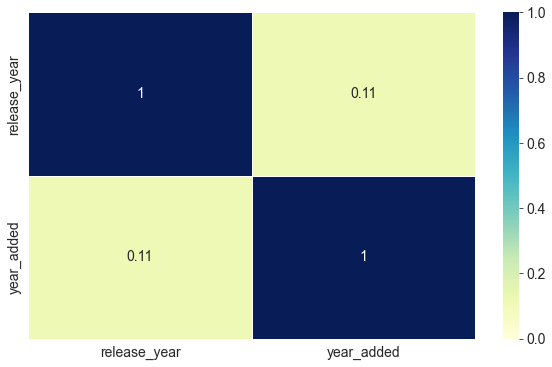

In [28]:
corrs = netflix.corr()
sns.heatmap(data=corrs, vmin=0, vmax=1, annot=True,linewidths=.5, cmap="YlGnBu")

*Observation:*
* *Correlation show between **realease_year** & **year_added***
    > As thesea are onlyt numerical features
* Correlation is very low b/w **realease_year** & **year_added** i.e. **0.11**

* > Don't find ant correlation between **realease_year** & **year_added**

### Analysing basic metrics 

#### 1. Type

* *Question based on metrics **type*** 

    1. > What is the ratio of Movie and TV Shows on Netflix ?
    >>
    2. >  Most Watch content on Netflix ?

##### Non-Graphical Analysis

In [29]:
# Total content on Netflix

netflix['type'].count()

8790

In [30]:
# Distribution of content on Netflix

netflix['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

*Insights:*

* > Types of content on netflix are **Movie** and **TV Show**
>>
* > From **8790** of total content, we have a count of:
    * >> *Movies:* **6126** 
    * >> *TV Show:* **2664** 

In [31]:
# Ratio of Movies and TV Show

def findRatio(df):
    x = df['type'].value_counts()
    y = len(df)
    r = (x/y).round(3)
    return pd.DataFrame(r).T

findRatio(netflix)


#  x = netflix.groupby(by='type')['type'].count()
# y = len(netflix)
# r = x/y
# r

,Movie,TV Show
type,0.697,0.303


*Insights:*

* > Ratio of different content on netlix:
    * >> *Movies:* **0.697** 
    * >> *TV Show:* **0.303** 

##### Visual Analysis

<AxesSubplot:title={'center':'Most watched Content on Netflix'}, xlabel='Content', ylabel='Count'>

findfont: Font family ['Lato, sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ["'Bebas Neue', cursive"] not found. Falling back to DejaVu Sans.


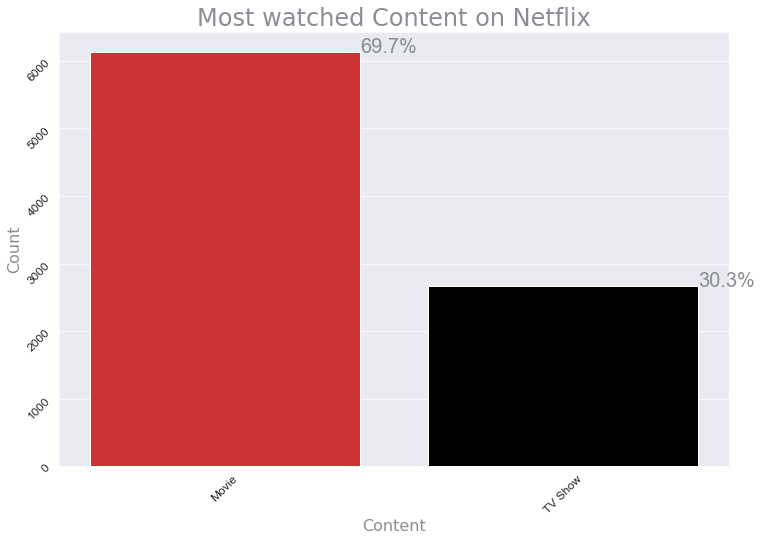

In [32]:
# Most watched Content on Netflix

def type(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='Most watched Content on Netflix',palette=['red','black'],x_label='Content',y_label='Count',hue=None,legend_pos=None,p_size=20,p_pos='left',p_color='#8a8d93')

type(netflix,'type')

*Insights:*

* > Types of content on netflix are **Movie** and **TV Show**
>>
* > Percentage of different content on netlix:
    * >> *Movies:* **69.7%** 
    * >> *TV Show:* **30.3%** 

##### Business Insights

1. > *What is the ratio of Movie and TV Shows on Netflix ?*
    * >> *Movies:* **0.697** 
    * >> *TV Show:* **0.303** 

2. > *Most Watch content on Netlix ?*
    * >> *Movies:* **69.7%** 
    * >> *TV Show:* **30.3%** 

3. > *Well, audience prefers Movies over TV Show as **69.7%** audience like Movies.*

##### Recommendations:

1. > *Well, audience prefers Movies over TV Show as **69.7%** audience like Movies.*,
    * >> **Netflix** should focus on adding more **Movies** as their **content.** 

#### 2. Rating

*Question based on metrics **rating***

1. > Top 3 Ratings, audience prefer to watch based on Movie ?
2. > Top 3 Ratings, audience prefer to watch based on TV Show ?
3. > Top 3 Ratings, audience prefer to watch based on Movie + TV Show ?
4. > Name 2 ratings, which netflix show add next year?

##### Non-Graphical Analysis

- *Rating based on Movies & TV Show content*

In [33]:
# Count of Different Ratings

netflix['rating'].nunique()

14

In [34]:
# Distribution of Ratings : Movies + TV Show

netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

*Insights:*

* > Different types of ratings:
    * >> *Count:* **14**
>>
* > Top 5 Ratings:
    * >> TV-MA 
    * >> TV-14 
    * >> TV-PG
    * >> R
    * >> PG-13

- *Rating based on Movies content*

In [35]:
# Count of Different Ratings : Movies Content

netflix_movies['rating'].nunique()

14

In [36]:
# Distribution of Ratings : Movies Content
netflix_movies['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

*Rating Insights:*

* > Different types of ratings of movies:
    * >> *Count:* **14**
>>
* > Top 5 Ratings of movies:
    * >> TV-MA 
    * >> TV-14 
    * >> R
    * >> TV-PG
    * >> PG-13

- *Rating based on TV Show content*

In [37]:
# Count of Different Ratings: TV Show

netflix_shows['rating'].nunique()

9

In [38]:
# Distribution of Ratings : TV Show Content
netflix_shows['rating'].value_counts()

TV-MA       1143
TV-14        730
TV-PG        321
TV-Y7        194
TV-Y         175
TV-G          94
NR             4
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

*Rating Insights:*

* > Different types of ratings of TV Shows:
    * >> *Count:* **9**
>>
* > Top 5 Ratings of TV Shows:
    * >> TV-MA 
    * >> TV-14 
    * >> TV-PG
    * >> PG-Y7
    * >> TV-Y

##### Visual Analysis

<AxesSubplot:title={'center':'Most watched Rating based on Movie'}, xlabel='Movie Rating', ylabel='Rating Count'>

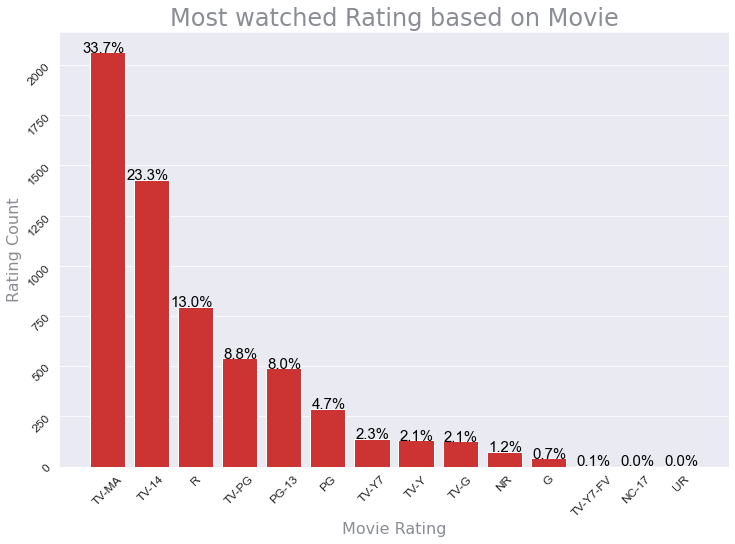

In [39]:
# Distribution of Ratings : Movies

def rating(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='Most watched Rating based on Movie',palette=['red'],x_label='Movie Rating',y_label='Rating Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='black')

rating(netflix_movies,'rating')

<AxesSubplot:title={'center':'Most watched Rating Based on TV Show'}, xlabel='TV Show Rating', ylabel='Rating Count'>

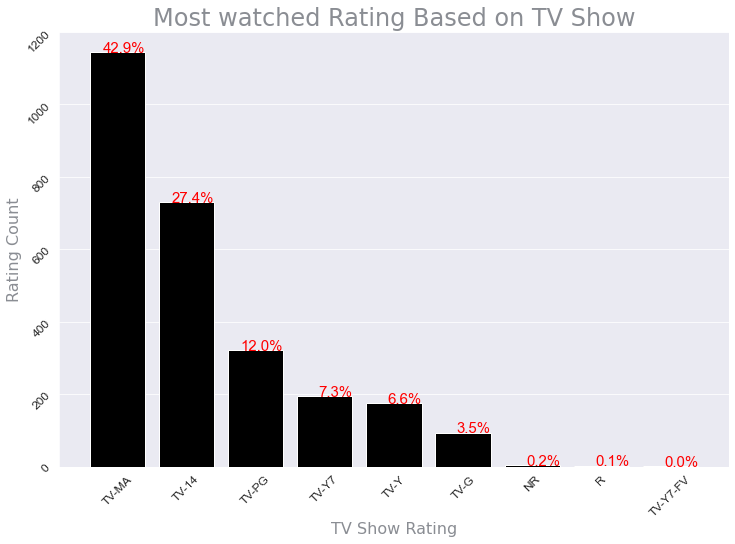

In [40]:
# Distribution of Ratings : TV Show

def rating(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='Most watched Rating Based on TV Show',palette=['Black'],x_label='TV Show Rating',y_label='Rating Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='red')

rating(netflix_shows,'rating')

<AxesSubplot:title={'center':'Distribution of overall Rating'}, xlabel='Content Rating', ylabel='Rating Count'>

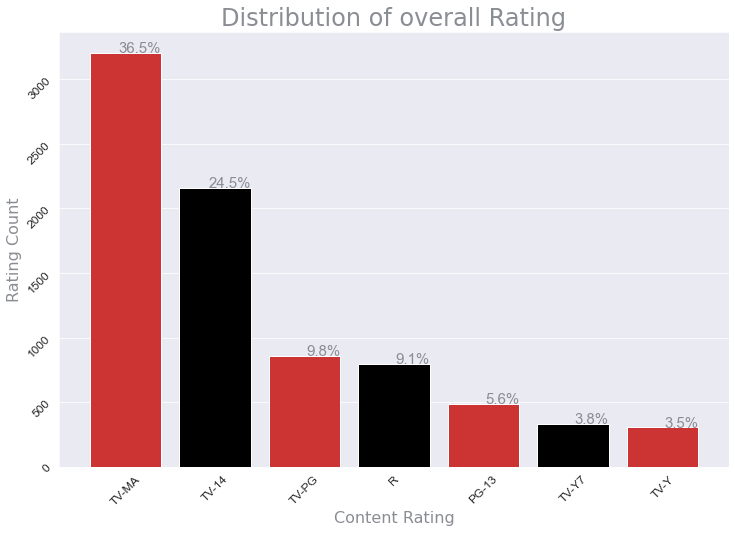

In [41]:
# Distribution of Ratings : Movies + Tv Shows

def rating(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Distribution of overall Rating',palette=['red','Black'],x_label='Content Rating',y_label='Rating Count',hue=None,legend_pos='center',p_size=15,p_pos='right',p_color='#8a8d93')

rating(netflix,'rating')

<AxesSubplot:title={'center':'Distribution of overall Rating'}, xlabel='Content Rating', ylabel='Rating Count'>

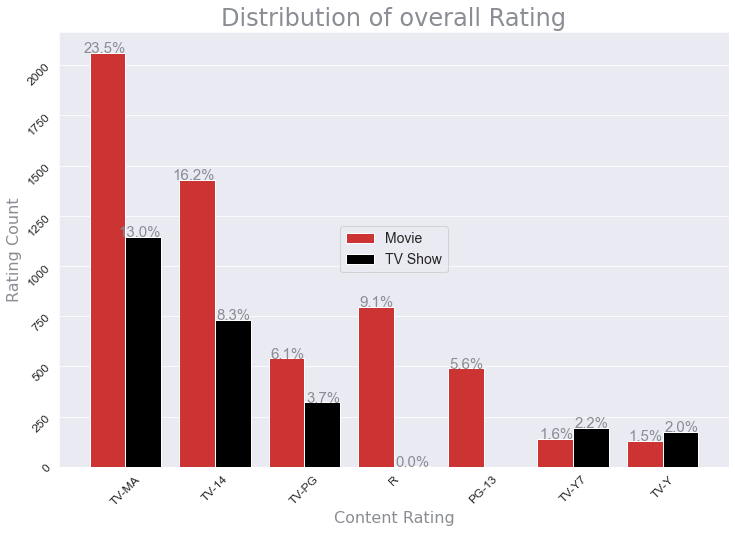

In [42]:
# Distribution of Ratings : Movies + Tv Shows

def rating(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Distribution of overall Rating',palette=['red','Black'],x_label='Content Rating',y_label='Rating Count',hue='type',legend_pos='center',p_size=15,p_pos='right',p_color='#8a8d93')

rating(netflix,'rating')

##### Business Insights

1. > *Top 3 Ratings, audience prefer to watch based on Movie ?*
    * >> *TV-MA:* **33.7%** 
    * >> *TV-14:* **23.3%** 
    * >> *R:* **13%** 

2. > *Top 3 Ratings, audience prefer to watch based on TV Show ?*
    * >> *TV-MA:* **42.9%** 
    * >> *TV-14:* **27.4%** 
    * >> *TV-PG:* **12%** 

2. > *Top 3 Ratings, audience prefer to watch based on Movie + TV Show ?*
    * >> *TV-MA:* **36.5%** 
    * >> *TV-14:* **24.5%** 
    * >> *TV-PG:* **9.8%** 

3. > *Well, audience prefers *TV-MA:* as **36.5%** of watching over other ratings.*

##### Recommendations:

1. > *Name 2 ratings, which netflix should add next year?*
    * >> **TV-MA** : As **36.5%** of content is watched of these ratings. 
    * >> **TV-14** : As **24.5%** of content is watched of these ratings. 

#### 3. Year

*Question based on metrics **year***

1. > How many movies were added over the years  ?
2. > How many tv shows were added over the years ?
3. > Top 7 years in which content is added?
4. > What is the impact of Netflix TV Shows or Movies over the years by comparing both.?

##### Non-Graphical Analysis

In [43]:
# How many movies were released over the years  ?

netflix_movies['year_added'].value_counts()

2019    1424
2020    1284
2018    1237
2021     993
2017     836
2016     251
2015      56
2014      19
2011      13
2013       6
2012       3
2009       2
2008       1
2010       1
Name: year_added, dtype: int64

In [44]:
# How many tv shows were released over the years ?

netflix_shows['year_added'].value_counts()

2020    595
2019    592
2021    505
2018    411
2017    349
2016    175
2015     26
2014      5
2013      5
2008      1
Name: year_added, dtype: int64

In [45]:
# Top 7 years in which content is added?

netflix['year_added'].value_counts()[:7]

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
Name: year_added, dtype: int64

##### Visual Analysis

<AxesSubplot:title={'center':'Movies were added over the years'}, xlabel='Year Added', ylabel='Movie Count'>

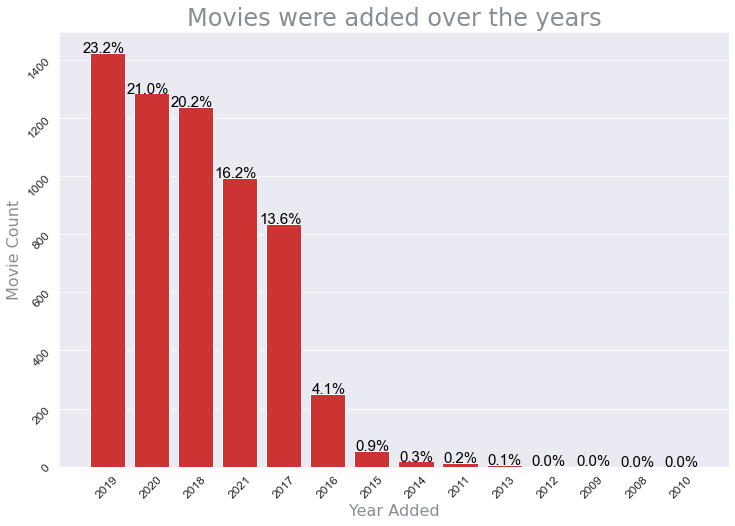

In [46]:
# How many movies were added over the years  ?

def movieAddedYearly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='Movies were added over the years',palette=['red'],x_label='Year Added',y_label='Movie Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='black')

movieAddedYearly(netflix_movies,'year_added')

<AxesSubplot:title={'center':'TV Show were added over the years'}, xlabel='Year Added', ylabel='TV Show Count'>

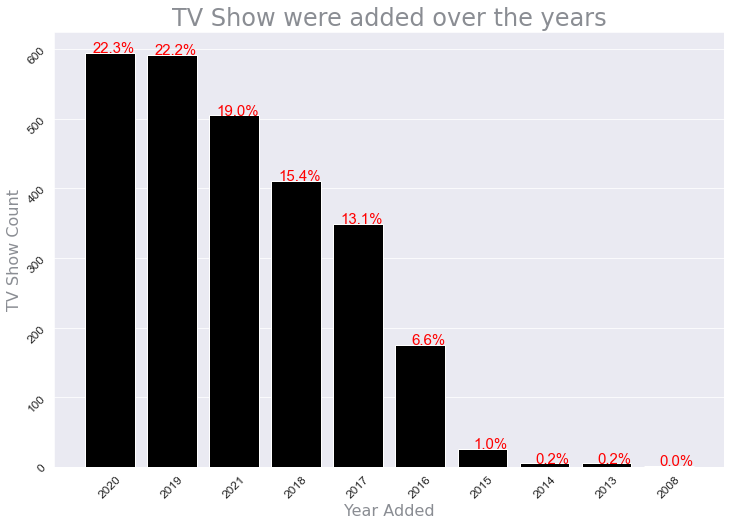

In [47]:
# How many tv shows were added over the years ?

def tvShowAddedYearly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='TV Show were added over the years',palette=['black'],x_label='Year Added',y_label='TV Show Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='red')

tvShowAddedYearly(netflix_shows,'year_added')

<AxesSubplot:title={'center':'Top 7 years wise content is added'}, xlabel='Year Added', ylabel='Content Count'>

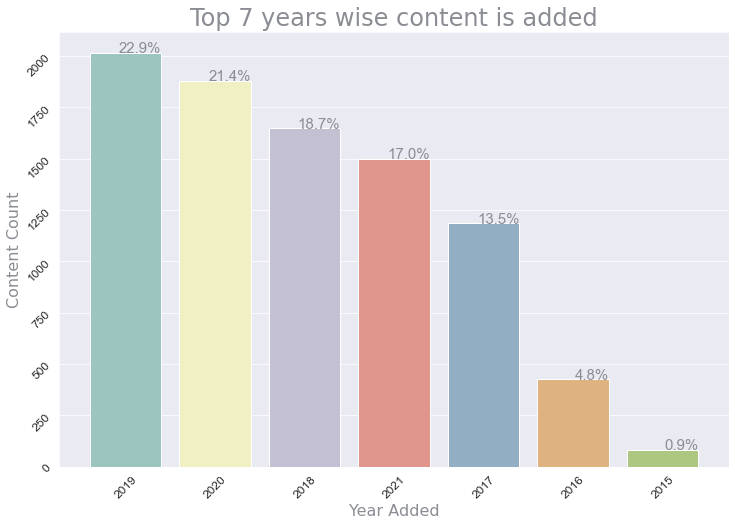

In [48]:
# Top 7 years in which content is added?

def contentAddedYearly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Top 7 years wise content is added',palette='Set3',x_label='Year Added',y_label='Content Count',hue=None,legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

contentAddedYearly(netflix,'year_added')

<AxesSubplot:title={'center':'Top 7 years wise content is added'}, xlabel='Year Added', ylabel='Content Count'>

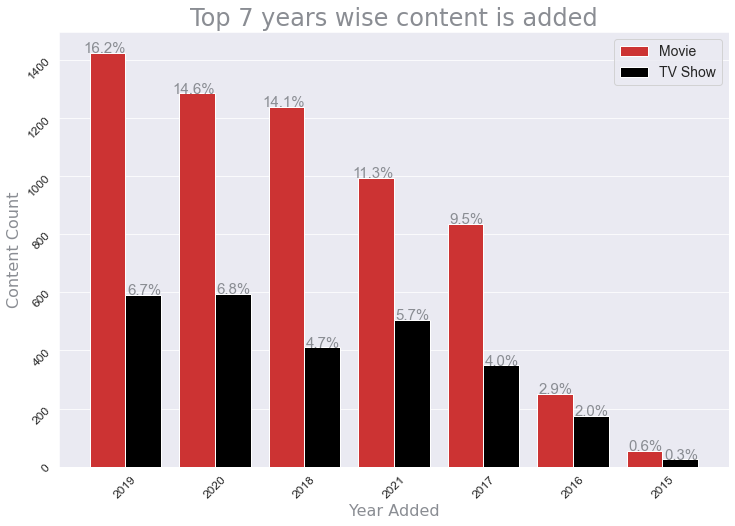

In [49]:
# Top 7 years in which content is added?

def contentAddedYearly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Top 7 years wise content is added',palette=['red','black'],x_label='Year Added',y_label='Content Count',hue='type',legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

contentAddedYearly(netflix,'year_added')

findfont: Font family ['Lato, sans-serif'] not found. Falling back to DejaVu Sans.


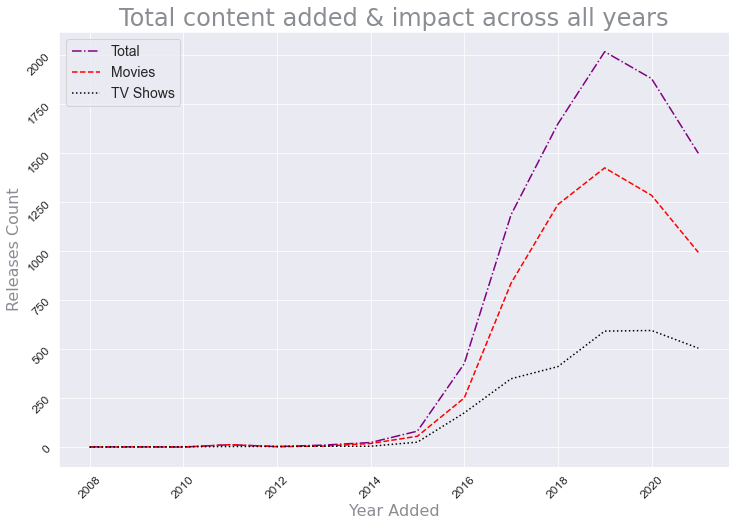

In [50]:
# What is the impact of Netflix TV Shows or Movies over the years by comparing both.?

def impactYearly(netflix,netflix_movies,netflix_shows):

    # DF Reconstruction
    total_df = netflix['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})
    movies_df = netflix_movies['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})
    shows_df = netflix_shows['year_added'].value_counts().reset_index().rename(columns={'index':'year','year_added':'count'})

    # ploting
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(data=total_df,x='year',y='count',color='purple',linestyle='dashdot')
    sns.lineplot(data=movies_df,x='year',y='count',color='red',linestyle='dashed')
    sns.lineplot(data=shows_df,x='year',y='count',color='black',linestyle='dotted')
    plt.title("Total content added & impact across all years",fontsize=24,color='#8a8d93',family="Lato, sans-serif")
    plt.legend(['Total','Movies','TV Shows'])
    plt.ylabel("Releases Count",fontsize=16,color='#8a8d93',family="Lato, sans-serif")
    plt.xlabel("Year Added",fontsize=16,color='#8a8d93',family="Lato, sans-serif")
    plt.yticks(rotation=45,size=12)
    plt.xticks(rotation=45,size=12)
    plt.show()

impactYearly(netflix,netflix_movies,netflix_shows)

##### Business Insights

1. > *How many movies were added over the years  ?*
    * >> *2019:* **23.2%** 
    * >> *2020:* **21.0%** 
    * >> *2018:* **20.2%** 

2. > *How many tv shows were added over the years ?*
    * >> *2020:* **22.3%** 
    * >> *2019:* **22.2%** 
    * >> *2021:* **19.0%** 

2. > *Top 7 years in which content is added?*
    * >> 2019,2020,2018,2021,2017,2016,2015

3. > *What is the impact of Netflix TV Shows or Movies over the years by comparing both.?*
    * >> As, we see graph is droping for all content after year **2020**, due to covid that impact changes.

> *The highest number of movies were released in **2019** and **2020** due to the covid releasing of movies were significantly dropped.*

#### 4. Month

*Question based on metrics **month***

1. > How many movies were added over the months  ?
2. > How many tv shows were added over the months ?
3. > Top 7 months in which content is added?
4. > What is the impact of Netflix TV Shows or Movies over the months by comparing both.?
5. > Which 5 month is the best month to add content?

##### Non-Graphical Analysis

In [51]:
# How many movies were added over the months  ?

netflix_movies['month_added'].value_counts()

July         565
April        549
December     547
January      545
October      545
March        528
September    518
August       518
November     498
June         492
May          439
February     382
Name: month_added, dtype: int64

In [52]:
# How many tv shows were added over the months ?

netflix_shows['month_added'].value_counts()

December     265
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     180
Name: month_added, dtype: int64

In [53]:
# Top 7 months in which content is added?

netflix['month_added'].value_counts()[:7]

July         827
December     812
September    769
April        763
October      760
August       754
March        741
Name: month_added, dtype: int64

##### Visual Analysis

<AxesSubplot:title={'center':'Movies were added over the months'}, xlabel='Month Added', ylabel='Movie Count'>

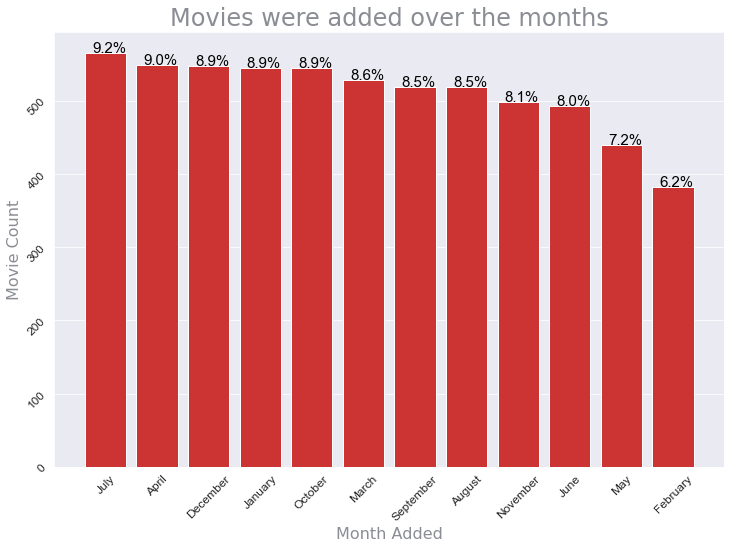

In [54]:
# How many movies were added over the months  ?

def movieAddedMonthly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='Movies were added over the months',palette=['red'],x_label='Month Added',y_label='Movie Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='black')

movieAddedMonthly(netflix_movies,'month_added')

<AxesSubplot:title={'center':'TV Show were added over the months'}, xlabel='Month Added', ylabel='TV Show Count'>

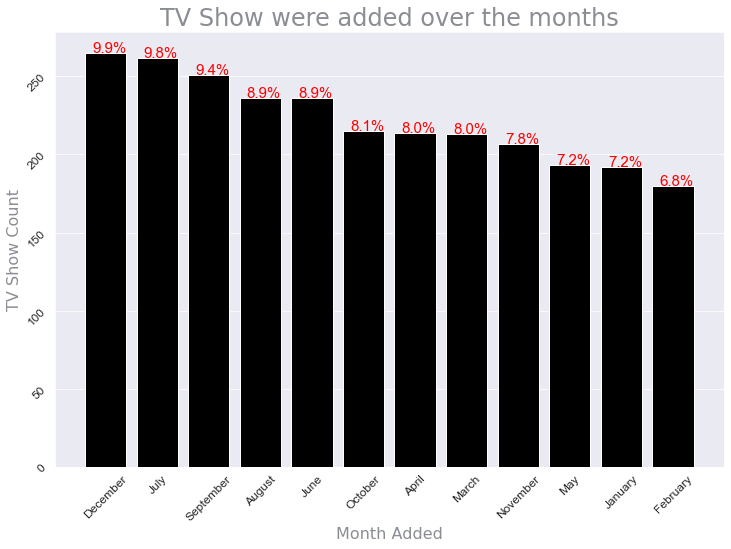

In [55]:
# How many tv shows were added over the months ?

def tvShowAddedMonthly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:],title='TV Show were added over the months',palette=['black'],x_label='Month Added',y_label='TV Show Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='red')

tvShowAddedMonthly(netflix_shows,'month_added')

<AxesSubplot:title={'center':'Top 7 month wise content is added'}, xlabel='Month Added', ylabel='Content Count'>

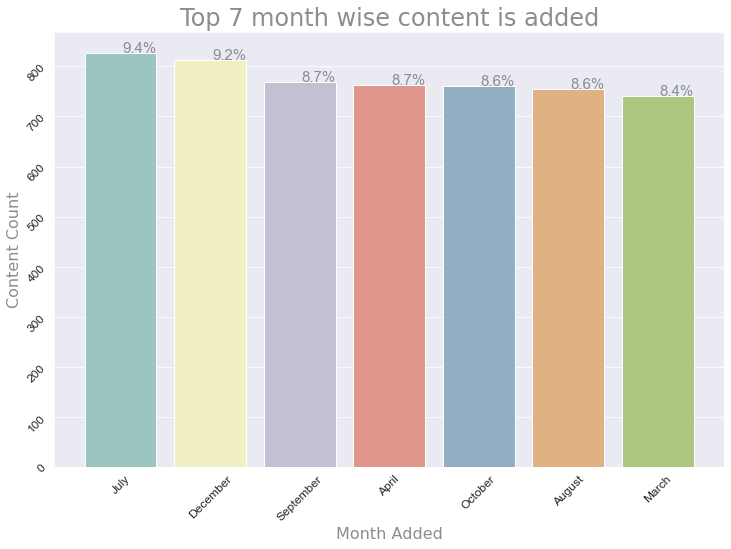

In [56]:
# Top 7 months in which content is added?

def contentAddedmonthly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Top 7 month wise content is added',palette='Set3',x_label='Month Added',y_label='Content Count',hue=None,legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

contentAddedmonthly(netflix,'month_added')

<AxesSubplot:title={'center':'Top 7 month wise content is added'}, xlabel='Month Added', ylabel='Content Count'>

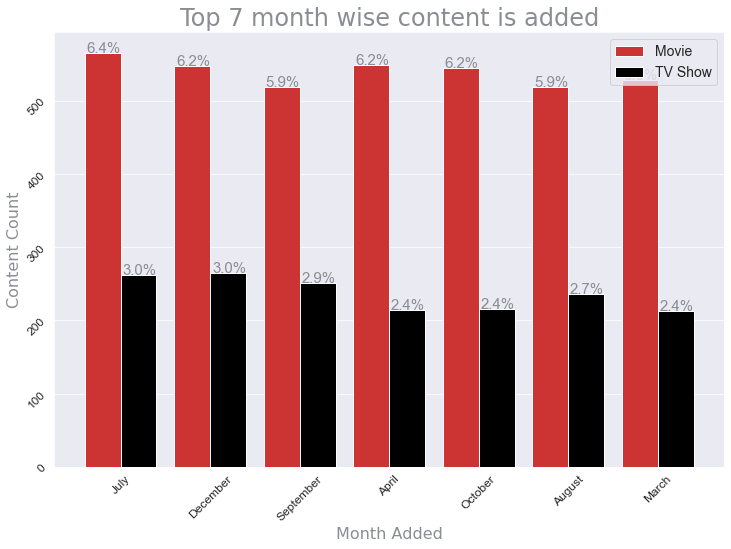

In [57]:
# Top 7 months in which content is added?

def contentAddedmonthly(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Top 7 month wise content is added',palette=['red','black'],x_label='Month Added',y_label='Content Count',hue='type',legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

contentAddedmonthly(netflix,'month_added')

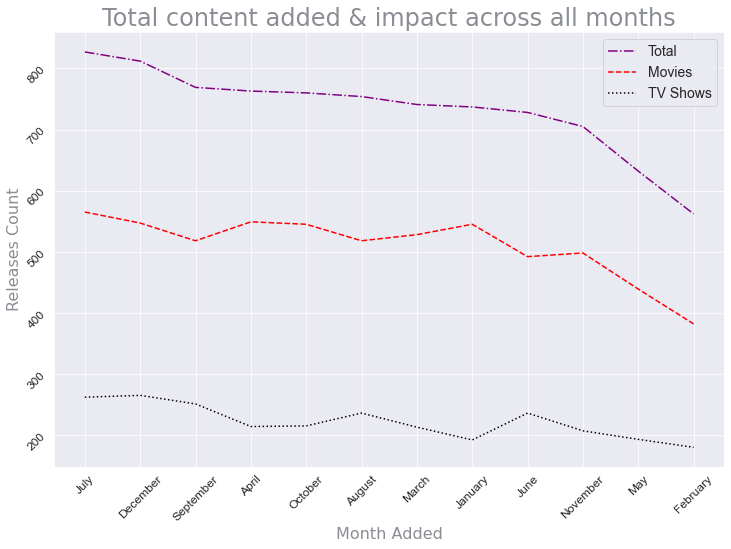

In [58]:
# What is the impact of Netflix TV Shows or Movies over the months by comparing both.?

def impactYearly(netflix,netflix_movies,netflix_shows):

# DF Reconstruction
    total_df = netflix['month_added'].value_counts().reset_index().rename(columns={'index':'month','month_added':'count'})
    movies_df = netflix_movies['month_added'].value_counts().reset_index().rename(columns={'index':'month','month_added':'count'})
    shows_df = netflix_shows['month_added'].value_counts().reset_index().rename(columns={'index':'month','month_added':'count'})

    # ploting
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(data=total_df,x='month',y='count',color='purple',linestyle='dashdot')
    sns.lineplot(data=movies_df,x='month',y='count',color='red',linestyle='dashed')
    sns.lineplot(data=shows_df,x='month',y='count',color='black',linestyle='dotted')
    plt.title("Total content added & impact across all months",fontsize=24,color='#8a8d93',family="Lato, sans-serif")
    plt.legend(['Total','Movies','TV Shows'])
    plt.ylabel("Releases Count",fontsize=16,color='#8a8d93',family="Lato, sans-serif")
    plt.xlabel("Month Added",fontsize=16,color='#8a8d93',family="Lato, sans-serif")
    plt.yticks(rotation=45,size=12)
    plt.xticks(rotation=45,size=12)
    plt.show()

impactYearly(netflix,netflix_movies,netflix_shows)

##### Business Insights

1. > *How many movies were added over the months  ?*
    * >> *July:* **9.2%** 
    * >> *April:* **9.0%** 
    * >> *December:* **8.9%** 

2. > *How many tv shows were added over the months ?*
    * >> *December:* **9.9%** 
    * >> *July:* **9.8%** 
    * >> *September:* **9.4%** 

2. > *Top 7 months in which content is added?*
    * >> July, December, September, April, October, August, March

3. > *What is the impact of Netflix TV Shows or Movies over the months by comparing both.?*
    * >> As, we see graph is drooping for all content in the month of **February**.

> *The highest number of content were added in **July** and **September***

##### Recommendation

> *Which 5 month is the best month to add content?*
* >> July
* >> December
* >> September
* >> April
* >> October

#### 5. Country

*Question based on metrics **country***

1. > How many movies were added across country  ?
2. > How many tv shows were added across country  ?
3. > Top 7 countries have most content?
4. > Which 5 Country is the best to add content?

##### Unpack Nested Features

In [59]:
netflix['country'].tail(10)

8797    United States, France, South Korea, Indonesia
8798                                            India
8799                                            India
8800                                         Pakistan
8801                     United Arab Emirates, Jordan
8802                                    United States
8803                                    United States
8804                                    United States
8805                                    United States
8806                                            India
Name: country, dtype: object

In [60]:
netflix_total = 0
def unpackNestedList(df,feature):
    global netflix_total
    constraints = df[feature].apply(lambda x: str(x).split(', ')).tolist()
    feature_df = pd.DataFrame(constraints,index=df['title'])
    feature_df = feature_df.stack()
    feature_df = pd.DataFrame(feature_df)
    feature_df.reset_index(inplace=True,drop=False,level=0)
    feature_df.rename(columns={0:feature},inplace=True)
    df = df.merge(feature_df,on='title',how='inner')
    print(f"Netflix Tidy: {df.shape}")
    return df

# query = ['director','country','cast']
# unpackNestedList(netflix,query)


def renameFeatureValue(df,feature,old_value,new_value):
    df[feature].replace(old_value,new_value,inplace=True)
    return

In [61]:
def countryPreprocessing(df):
    global country_df,country_movies,country_shows
    country_df = unpackNestedList(df,'country')
    renameFeatureValue(df=country_df,feature='country_y',old_value='United States',new_value='USA')
    renameFeatureValue(df=country_df,feature='country_y',old_value='United Kingdom',new_value='UK')
    renameFeatureValue(df=country_df,feature='country_y',old_value='United Arab Emirates',new_value='UAE')
    renameFeatureValue(df=country_df,feature='country_y',old_value='South Korea',new_value='S. Korea')
    country_movies = country_df[country_df['type']=='Movie']
    country_shows = country_df[country_df['type']=='TV Show']
    return 

countryPreprocessing(netflix)

Netflix Tidy: (10828, 13)


In [62]:
country_df.shape

(10828, 13)

In [63]:
country_shows.shape

(3019, 13)

In [64]:
country_movies.shape

(7809, 13)

##### Non-Graphical Analysis

In [65]:
# How many movies were added across country  ?

country_movies['country_y'].value_counts()

USA           3187
India          962
UK             532
Canada         319
France         303
              ... 
Bermuda          1
Angola           1
Armenia          1
Mongolia         1
Montenegro       1
Name: country_y, Length: 122, dtype: int64

In [66]:
# How many tv shows were added across country  ?

country_shows['country_y'].value_counts()

USA            1322
UK              271
Japan           197
S. Korea        170
Canada          126
               ... 
Malta             1
Belarus           1
UAE               1
Uruguay           1
Switzerland       1
Name: country_y, Length: 66, dtype: int64

In [67]:
# Top 7 countries have most content?

country_df['country_y'].value_counts()[:7]

USA       4509
India     1046
UK         803
Canada     445
France     393
Japan      316
Spain      232
Name: country_y, dtype: int64

##### Visual Analysis

<AxesSubplot:title={'center':'Movies were added across country'}, xlabel='Country', ylabel='Movie Count'>

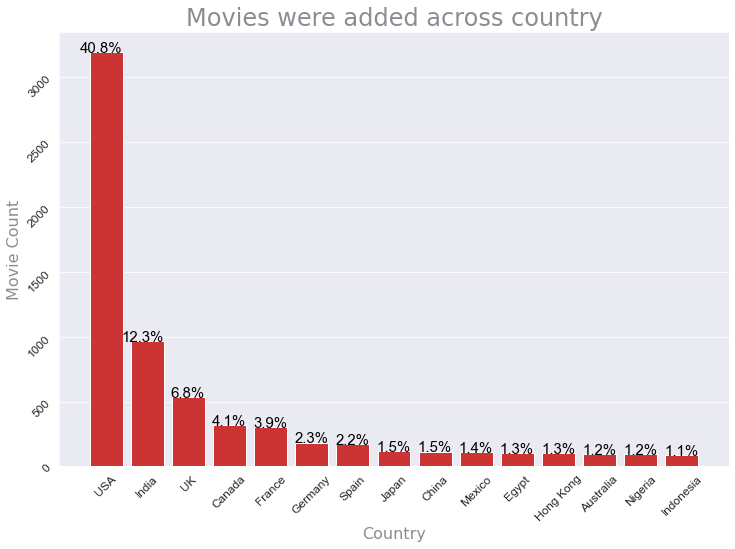

In [68]:
# How many movies were added across country  ?

def movie(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:15],title='Movies were added across country',palette=['red'],x_label='Country',y_label='Movie Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='black')

movie(country_movies,'country_y')

<AxesSubplot:title={'center':'TV Show were added across country'}, xlabel='Country', ylabel='TV Show Count'>

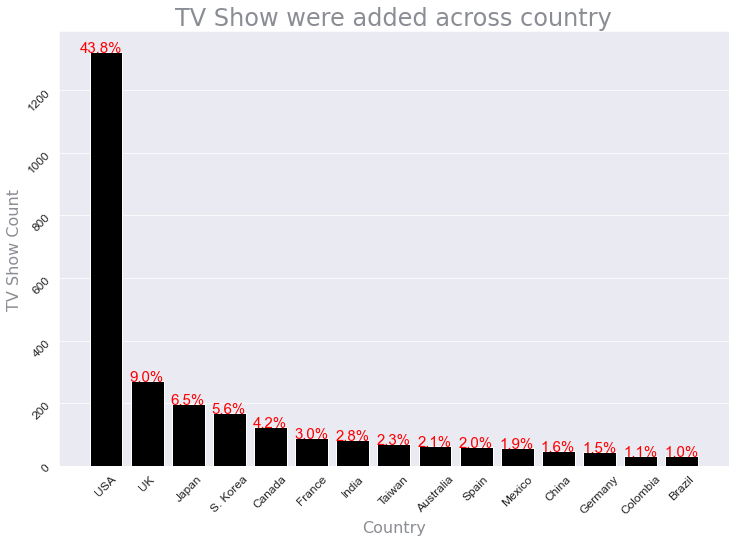

In [69]:
# How many tv shows were added across country  ?

def shows(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:15],title='TV Show were added across country',palette=['black'],x_label='Country',y_label='TV Show Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='red')

shows(country_shows,'country_y')

<AxesSubplot:title={'center':'Top 7 countries have most content'}, xlabel='Country', ylabel=' Content Count'>

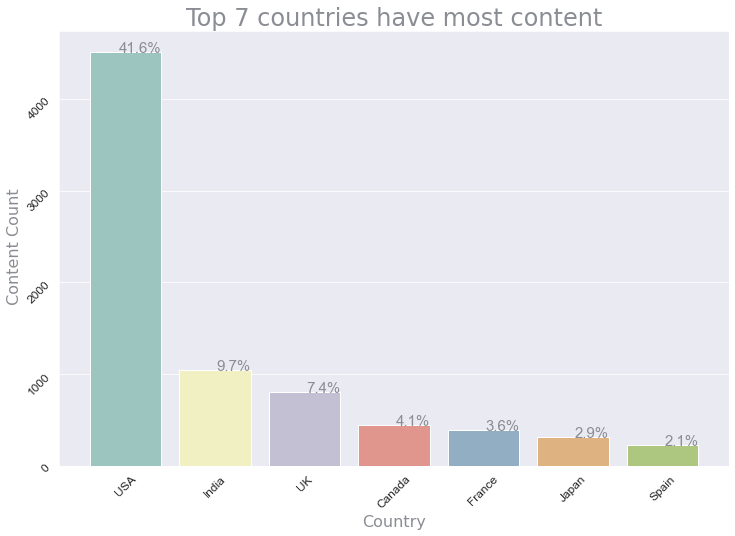

In [70]:
# Top 7 countries have most content?

def topCountries(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Top 7 countries have most content',palette='Set3',x_label='Country',y_label=' Content Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='#8a8d93')

topCountries(country_df,'country_y')

<AxesSubplot:title={'center':'Top 7 countries have most content'}, xlabel='Country', ylabel='Content Count'>

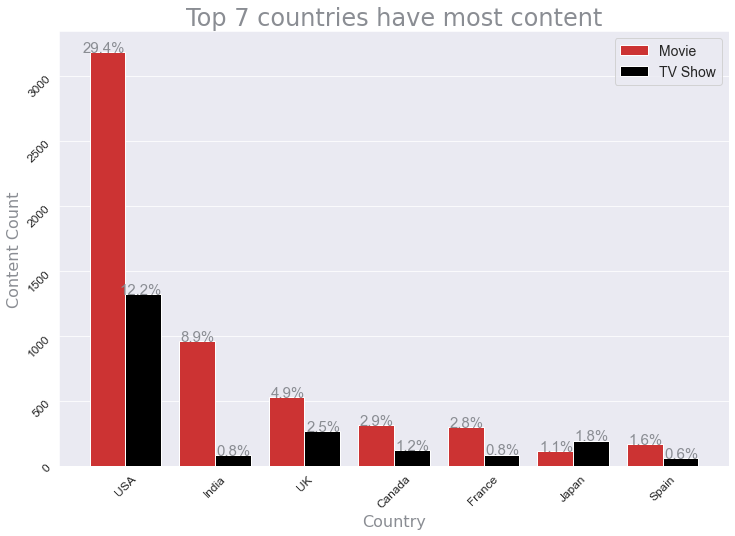

In [71]:
# Top 7 months in which content is added?

def topCountries(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[:7],title='Top 7 countries have most content',palette=['red','black'],x_label='Country',y_label='Content Count',hue='type',legend_pos='best',p_size=15,p_pos='right',p_color='#8a8d93')

topCountries(country_df,'country_y')

##### Business Insights

1. > *How many movies were added across country  ?*
    * >> *USA:* **40.8%** 
    * >> *India:* **12.3%** 
    * >> *UK:* **6.8%** 

2. > *How many tv shows were added across country  ?*
    * >> *USA:* **43.8%**
    * >> *UK:* **9.0%** 
    * >> *Japan:* **6.5%**

2. > *Top 7 countries have most content?*
    * >> USA, India, UK, Canada, France, Japan, Spain
.

> *The highest number of content were added in **USA** and **India*** with **41.6%** & **9.7%**.

##### Recommendation

> *Which 5 Country is the best to add content?*
* >> USA
* >> India
* >> UK
* >> Canada
* >> France

#### 6. Director

*Question based on metrics **director***

1. > Top Directors on Netflix based on movie  ?
2. > Top Directors on Netflix based on tv show  ?
3. > Top 7 directors on Netflix?
4. > To which director netflix should collab for next year?

##### Unpack Nested Features

In [72]:
netflix['director'].head(10)

0                  Kirsten Johnson
1                      No Director
2                  Julien Leclercq
3                      No Director
4                      No Director
5                    Mike Flanagan
6    Robert Cullen, José Luis Ucha
7                     Haile Gerima
8                  Andy Devonshire
9                   Theodore Melfi
Name: director, dtype: object

In [73]:
def unpackNestedList(df,feature):
    global netflix_total
    constraints = df[feature].apply(lambda x: str(x).split(', ')).tolist()
    feature_df = pd.DataFrame(constraints,index=df['title'])
    feature_df = feature_df.stack()
    feature_df = pd.DataFrame(feature_df)
    feature_df.reset_index(inplace=True,drop=False,level=0)
    feature_df.rename(columns={0:feature},inplace=True)
    df = df.merge(feature_df,on='title',how='inner')
    print(f"Netflix Tidy: {df.shape}")
    return df

# query = ['director','country','cast']
# unpackNestedList(netflix,query)


def renameFeatureValue(df,feature,old_value,new_value):
    df[feature].replace(old_value,new_value,inplace=True)
    return

In [74]:
def directorPreprocessing(df):
    global director_df,director_movies,director_shows
    director_df = unpackNestedList(df,'director')
    director_movies = director_df[director_df['type']=='Movie']
    director_shows = director_df[director_df['type']=='TV Show']
    return 

directorPreprocessing(netflix)

Netflix Tidy: (9595, 13)


In [75]:
director_df.shape

(9595, 13)

In [76]:
director_shows.shape

(2746, 13)

In [77]:
director_movies.shape

(6849, 13)

In [78]:
director_df.columns

Index(['show_id', 'type', 'title', 'director_x', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'genre', 'month_added',
       'year_added', 'director_y'],
      dtype='object')

##### Non-Graphical Analysis

In [79]:
# Top Directors on Netflix based on movie  ?

director_movies['director_y'].value_counts()[1:]

Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Marcus Raboy         15
                     ..
Vrinda Samartha       1
Nicholaus Goossen     1
Stig Bergqvist        1
Paul Demeyer          1
Mozez Singh           1
Name: director_y, Length: 4775, dtype: int64

In [80]:
# Top Directors on Netflix based on tv show  ?

director_shows['director_y'].value_counts()[1:]

Alastair Fothergill      3
Ken Burns                3
Iginio Straffi           2
Gautham Vasudev Menon    2
Hsu Fu-chun              2
                        ..
Jesse Vile               1
Ellena Wood              1
Picky Talarico           1
Pedro Waddington         1
Michael Cumming          1
Name: director_y, Length: 299, dtype: int64

In [81]:
# Top 7 directors on Netflix?

director_df['director_y'].value_counts()[1:8]

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Name: director_y, dtype: int64

##### Visual Analysis

<AxesSubplot:title={'center':'Top Directors on Netflix based on movie'}, xlabel='Director', ylabel='Movie Count'>

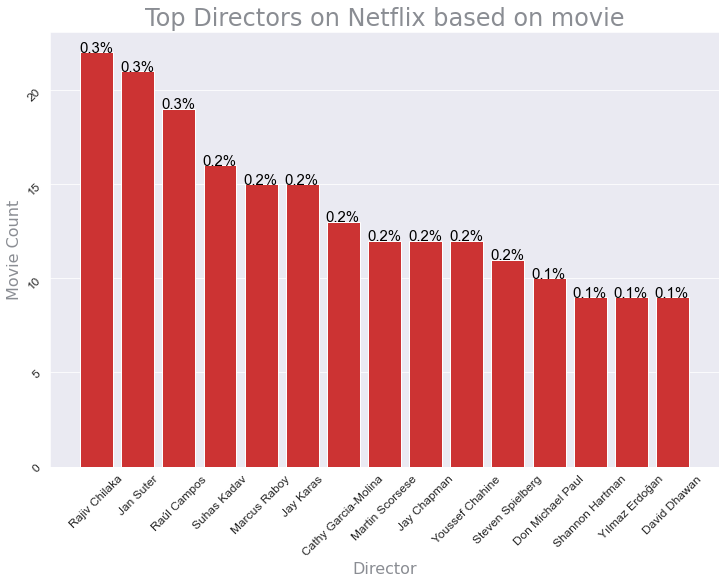

In [82]:
# Top Directors on Netflix based on movie  ?

def movie(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:16],title='Top Directors on Netflix based on movie',palette=['red'],x_label='Director',y_label='Movie Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='black')

movie(director_movies,'director_y')

<AxesSubplot:title={'center':'Top Directors on Netflix based on tv show'}, xlabel='Director', ylabel='TV Show Count'>

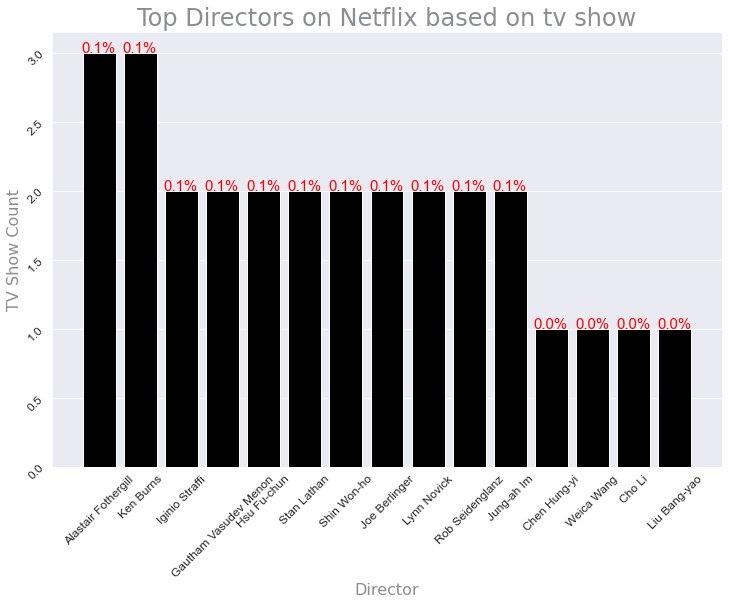

In [83]:
# Top Directors on Netflix based on tv show  ?

def shows(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:16],title='Top Directors on Netflix based on tv show',palette=['black'],x_label='Director',y_label='TV Show Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='red')

shows(director_shows,'director_y')

<AxesSubplot:title={'center':'Top 7 directors on Netflix'}, xlabel='Director', ylabel=' Content Count'>

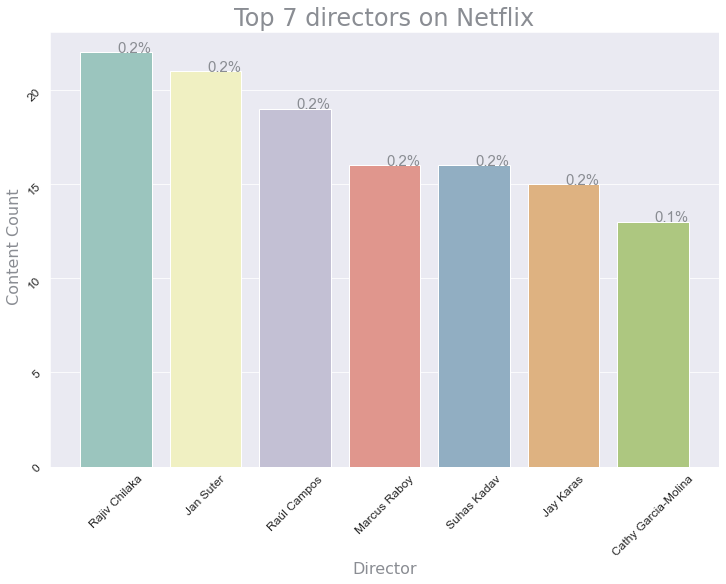

In [84]:
# Top 7 directors on Netflix?

def topCountries(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:8],title='Top 7 directors on Netflix',palette='Set3',x_label='Director',y_label=' Content Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='#8a8d93')

topCountries(director_df,'director_y')

<AxesSubplot:title={'center':'Top 7 directors on Netflix'}, xlabel='Director', ylabel='Content Count'>

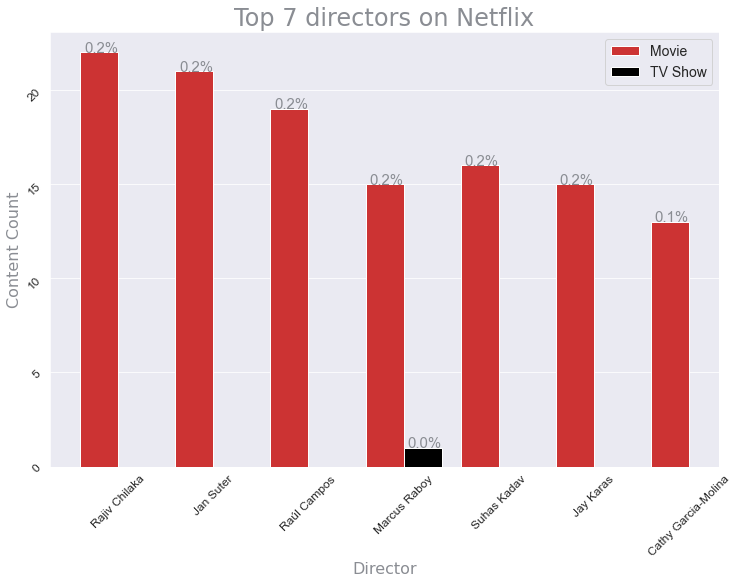

In [85]:
# Top 7 directors on Netflix?

def topCountries(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:8],title='Top 7 directors on Netflix',palette=['red','black'],x_label='Director',y_label='Content Count',hue='type',legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

topCountries(director_df,'director_y')

##### Business Insights

1. > *Top Directors on Netflix based on movie  ?*
    * >> *Rajiv Chilaka:* **0.3%** 
    * >> *Jan Suter:* **0.3%** 
    * >> *Raúl Campos:* **0.3%** 

2. > *Top Directors on Netflix based on tv show  ?*
    * >> *Alastair Fothergill:* **0.1%** 
    * >> *Ken BurnsKen Burns:* **0.1%** 
    * >> *Iginio Straffi:* **0.1%**

2. > *Top 7 directors on Netflix?*
    * > Rajiv Chilaka, Jan Suter, Raúl Campos,Marcus Raboy, Suhas Kadav , Jay Karas, Cathy Garcia-Molina
.

##### Recommendation

> *Top 3 director netflix should collab for next year?*
* >> Rajiv Chilaka
* >> Jan Suter
* >> Raúl Campos

#### 6. Cast

*Question based on metrics **cast***

1. > Top Cast on Netflix based on movie  ?
2. > Top Cast on Netflix based on tv show  ?
3. > Top 7 Cast on Netflix?
4. > To which Cast netflix should collab for next year?

##### Unpack Nested Features

In [86]:
netflix['cast'].head(10)

0                                              No Cast
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                              No Cast
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5    Kate Siegel, Zach Gilford, Hamish Linklater, H...
6    Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7    Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9    Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
Name: cast, dtype: object

In [87]:
def unpackNestedList(df,feature):
    global netflix_total
    constraints = df[feature].apply(lambda x: str(x).split(', ')).tolist()
    feature_df = pd.DataFrame(constraints,index=df['title'])
    feature_df = feature_df.stack()
    feature_df = pd.DataFrame(feature_df)
    feature_df.reset_index(inplace=True,drop=False,level=0)
    feature_df.rename(columns={0:feature},inplace=True)
    df = df.merge(feature_df,on='title',how='inner')
    print(f"Netflix Tidy: {df.shape}")
    return df

# query = ['director','country','cast']
# unpackNestedList(netflix,query)


def renameFeatureValue(df,feature,old_value,new_value):
    df[feature].replace(old_value,new_value,inplace=True)
    return

In [88]:
def castPreprocessing(df):
    global cast_df,cast_movies,cast_shows
    cast_df = unpackNestedList(df,'cast')
    cast_movies = cast_df[cast_df['type']=='Movie']
    cast_shows = cast_df[cast_df['type']=='TV Show']
    return 

castPreprocessing(netflix)

Netflix Tidy: (64841, 13)


In [89]:
cast_df.shape

(64841, 13)

In [90]:
cast_shows.shape

(19903, 13)

In [91]:
cast_movies.shape

(44938, 13)

In [92]:
cast_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast_x', 'country',
       'date_added', 'release_year', 'rating', 'genre', 'month_added',
       'year_added', 'cast_y'],
      dtype='object')

##### Non-Graphical Analysis

In [93]:
# Top Cast on Netflix based on movie  ?

cast_movies['cast_y'].value_counts()[1:]

Anupam Kher              42
Shah Rukh Khan           35
Naseeruddin Shah         32
Akshay Kumar             30
Om Puri                  30
                         ..
Yusuf Hussain             1
Amarjeet Amle             1
Priya                     1
Mukhtar Khan              1
Chittaranjan Tripathy     1
Name: cast_y, Length: 25944, dtype: int64

In [94]:
# Top Cast on Netflix based on tv show  ?

cast_shows['cast_y'].value_counts()[1:]

Takahiro Sakurai      25
Yuki Kaji             19
Junichi Suwabe        17
Daisuke Ono           17
Ai Kayano             16
                      ..
Bebe Neuwirth          1
Zeljko Ivanek          1
Erich Bergen           1
Geoffrey Arend         1
Hina Khawaja Bayat     1
Name: cast_y, Length: 14801, dtype: int64

In [95]:
# Top 7 Cast on Netflix?

cast_df['cast_y'].value_counts()[1:8]

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Name: cast_y, dtype: int64

##### Visual Analysis

<AxesSubplot:title={'center':'Top Cast on Netflix based on movie'}, xlabel='Cast', ylabel='Movie Count'>

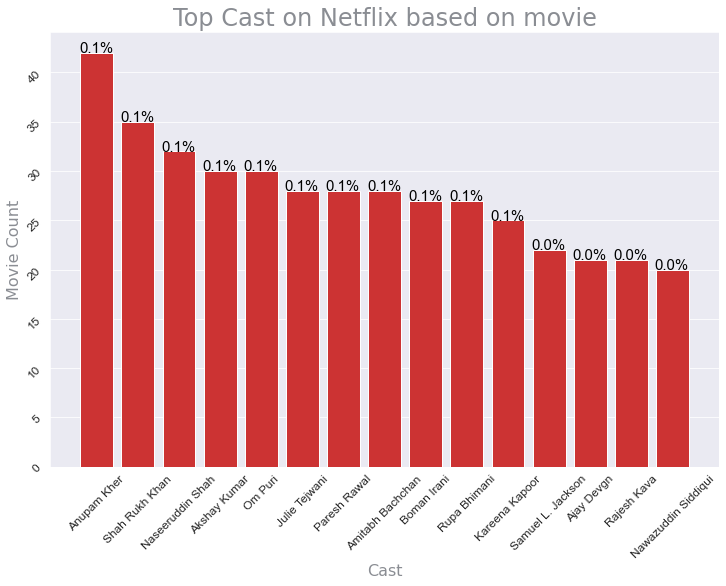

In [96]:
# Top Cast on Netflix based on movie  ?

def movie(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:16],title='Top Cast on Netflix based on movie',palette=['red'],x_label='Cast',y_label='Movie Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='black')

movie(cast_movies,'cast_y')

<AxesSubplot:title={'center':'Top Cast on Netflix based on tv show'}, xlabel='Cast', ylabel='TV Show Count'>

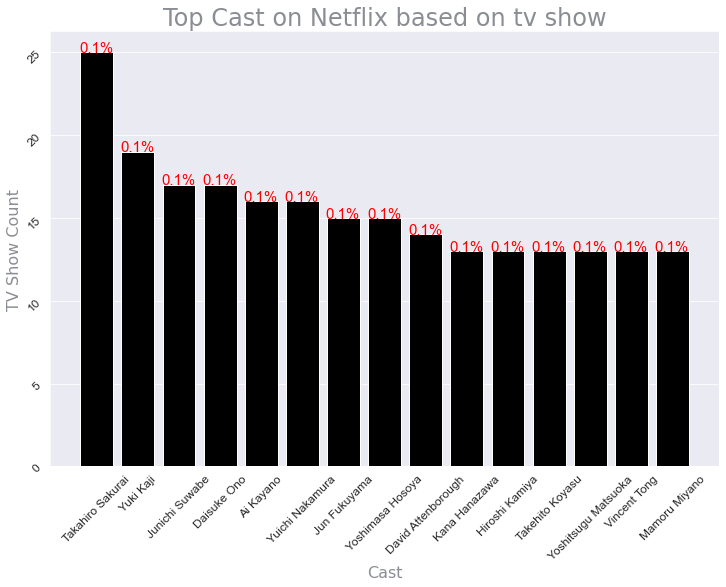

In [97]:
# Top Cast on Netflix based on tv show  ?

def shows(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:16],title='Top Cast on Netflix based on tv show',palette=['black'],x_label='Cast',y_label='TV Show Count',hue=None,legend_pos=None,p_size=15,p_pos='right',p_color='red')

shows(cast_shows,'cast_y')

<AxesSubplot:title={'center':'Top 7 casts on Netflix'}, xlabel='Cast', ylabel='Content Count'>

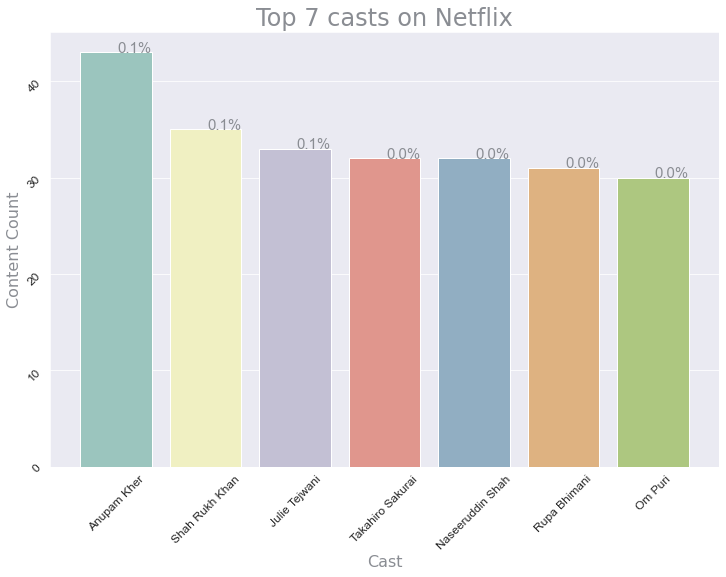

In [98]:
# Top 7 Cast on Netflix?

def topCast(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:8],title='Top 7 casts on Netflix',palette='Set3',x_label='Cast',y_label='Content Count',hue=None,legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

topCast(cast_df,'cast_y')

<AxesSubplot:title={'center':'Top 7 casts on Netflix'}, xlabel='Cast', ylabel='Content Count'>

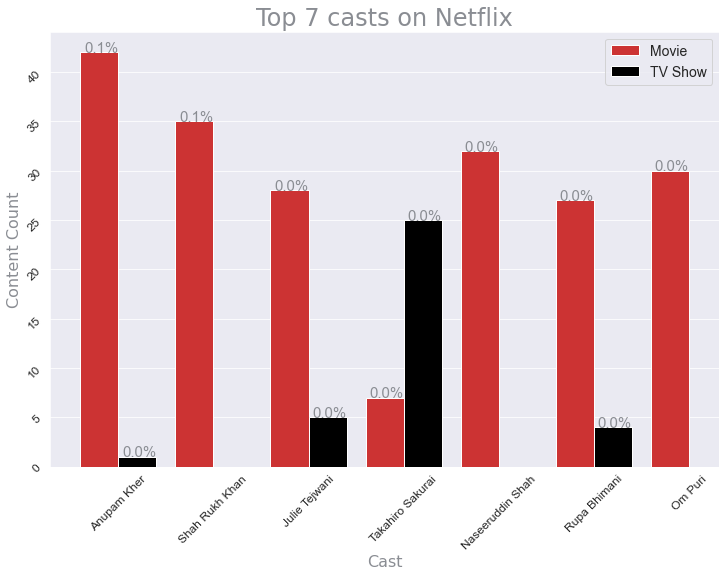

In [99]:
# Top 7 Cast on Netflix?

def topCast(df,features):
    return countPlot(df,features=features,order=df[features].value_counts().index[1:8],title='Top 7 casts on Netflix',palette=['red','black'],x_label='Cast',y_label='Content Count',hue='type',legend_pos='upper right',p_size=15,p_pos='right',p_color='#8a8d93')

topCast(cast_df,'cast_y')

##### Business Insights

1. > *Top Cast on Netflix based on movie  ?*
    * >> *Anupam Kher:* **42** 
    * >> *Shah Rukh Khan:* **35** 
    * >> *Raúl Campos:* **32** 

2. > *Top Cast on Netflix based on tv show  ?*
    * >> *Takahiro Sakurai:* **25** 
    * >> *Yuki Kaji:* **19** 
    * >> *Junichi Suwabe:* **17**

2. > *Top 7 Cast on Netflix?*
    * > Anupam Kher, Shah Rukh Khan, Takahiro Sakurai ,Rupa Bhimani, Om Puri
.

##### Recommendation

> *Top 3 Cast netflix should collab for next year?*
* >> Anupam Kher 
* >> Shah Rukh Khan
* >> Julie Tejwani 